1.   AR -- AUTO REGRESSION (Correlation with the past values)
2.   I -- INTEGRATION (Differencing or log to make data non stationary)
3.   MA -- MOVING AVERAGE (Correltaion with the past Error terms)

HYPER - PARAMETERS
1. p: ORDER OF AR: No of correlated periods (PACF Plot)

  p is found from PACF

2. q: ORDER OF MA : No of correlated error terms (ACF Plot)

  q from ACF PLOTS

3. D: Order of differencing

THE AUTO-REGRESSION MODEL (AR)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/uspopulation.csv",index_col= "DATE",  parse_dates= True)

In [3]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='DATE'>

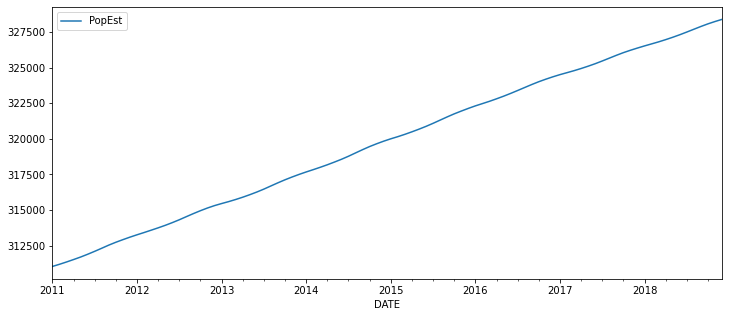

In [4]:
df.plot(figsize = (12, 5))

In [5]:
train = df.iloc[:84]
test = df.iloc[84: ]

In [6]:
from statsmodels.tsa.ar_model import AR, ARResults

In [7]:
model1 = AR(train['PopEst'])

In [8]:
AR1fit = model1.fit(maxlag = 1)

In [9]:
AR1fit.k_ar

1

In [10]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [11]:
start = len(train)
start

84

In [12]:
end = len(df) - 1
end

95

In [13]:
predictions1 = AR1fit.predict(start = start, end = end)
predictions1 = predictions1.rename('AR(1)')
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1), dtype: float64

In [14]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


<AxesSubplot:xlabel='DATE'>

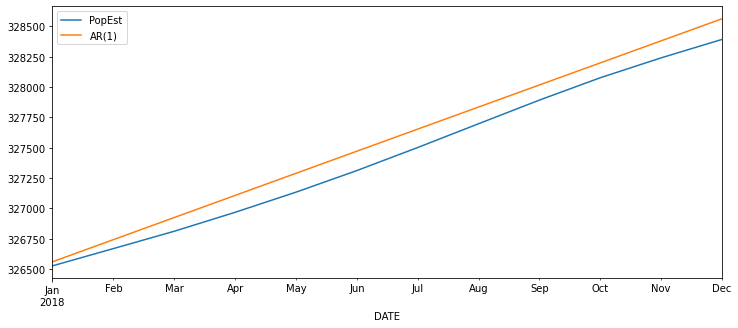

In [15]:
test.plot(figsize = (12, 5), legend = True)
predictions1.plot(legend = True)

In [16]:
model2 = AR(train["PopEst"])

In [17]:
AR2fit = model2.fit(maxlag = 2)

In [18]:
AR2fit.k_ar

2

In [19]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [20]:
predictions2 = AR2fit.predict(start = start, end = end)
predictions2 = predictions2.rename('AR(2)')
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045895
2018-07-01    327502.787330
2018-08-01    327665.826846
2018-09-01    327829.064479
2018-10-01    327992.414808
2018-11-01    328155.804858
2018-12-01    328319.172306
Freq: MS, Name: AR(2), dtype: float64

In [21]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


<AxesSubplot:xlabel='DATE'>

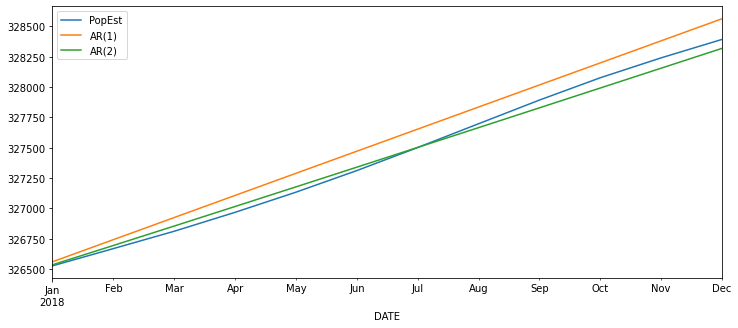

In [22]:
test.plot(figsize = (12, 5), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

Finding the optimum order using ic criterion in model

In [23]:
model = AR(train["PopEst"])

In [24]:
ARfit = model.fit(ic= "t-stat")

In [25]:
ARfit.k_ar

8

In [26]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [27]:
predictions8 = ARfit.predict(start= start, end= end)
predictions8 = predictions8.rename("AR(8)")

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
labels = ["AR(1)", "AR(2)", "AR(8)"]
pred = [predictions1, predictions2, predictions8]

In [30]:
for i in range (3):
    mse = mean_squared_error(test["PopEst"], pred[i])
    print("MSE for {}: {}".format(labels[i], mse))

MSE for AR(1): 17449.714237833407
MSE for AR(2): 2713.258683668394
MSE for AR(8): 186.97263605698208


We can observe that by using a built-in criterion we are able to select the proper order with the least mean squared error

Plotting the curve for the three predictions

<AxesSubplot:xlabel='DATE'>

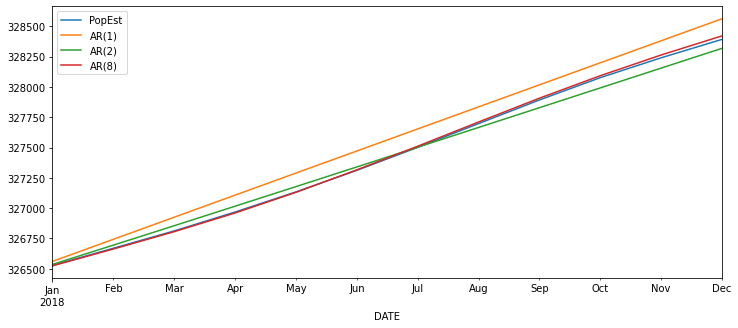

In [31]:
test.plot(figsize = (12, 5), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions8.plot(legend = True)

Training the whole model for predicting future 

In [32]:
model = AR(df['PopEst'])
AR_fit = model.fit(ic= "t-stat")

In [33]:
forecast = AR_fit.predict(start= len(df), end= len(df)+ 12).rename("Forecast")

<AxesSubplot:xlabel='DATE'>

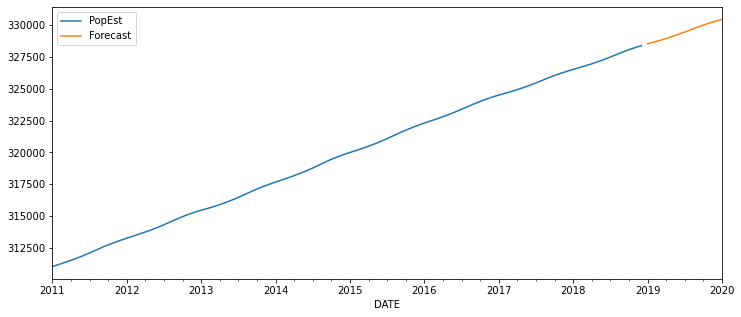

In [34]:
df["PopEst"].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

Optimizing the ARIMA order components (p, d, q)

1. Using the correlation plots

A) ACF (Auto-correlation function) plots.(Best to identify MA and its order)                                                   
It shows a sharp drop in case of moving average model and the lag at which the sharp drop occurs is the order of the MA.


B) PACF (Auto-correlation function) plots.(Best to identify AR and its order)                           
It shows a sharp drop in case of Auto regression model and the lag at which the sharp drop occurs is the order of the AR.

2. Using grid search in pmdairma (pyramid arima )

In [35]:
pip install pmdarima

In [36]:
import pmdarima

In [37]:
from pmdarima import auto_arima

In [38]:
df_stationary = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv", index_col = 0, parse_dates = True)
df_stationary.index.freq = "D"

In [39]:
df_non_stationary = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col = "Month", parse_dates = True)
df_non_stationary.index.freq = "MS"

In [43]:
best_arima = auto_arima(df_stationary["Births"], start_P= 0, start_Q= 0, max_p= 6, max_q= 3, seasonal= False, trace= False)

In [42]:
best_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 31 May 2022   AIC                           2459.074
Time:                        14:35:59   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
best_arima_non_stationary = auto_arima(df_non_stationary["Thousands of Passengers"], start_p= 0, start_q= 0, max_p= 4, max_q= 4, seasonal= True, trace= True, m= 12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.34 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.58 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [47]:
best_arima_non_stationary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 31 May 2022   AIC                           1019.178
Time:                                     14:46:38   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""